# Compare parameter space in emulator vs Chabanier et al. (2019)

For each simulation used in Rogers et al. (2019), read the GenIC parameter file and compute new parameters describing the linear power spectrum.

Compare the parameter volume sampled in (Delta_L^2, n_eff) with Figure 20 of Chabanier et al. (2019) - DR14 eBOSS P1D

In [1]:
%matplotlib inline
import numpy as np
import os
## Set default plot size, as normally its a bit too small
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 150
mpl.rcParams['figure.dpi'] = 150
import lya_results as lya

In [2]:
def read_from_file(filename):
    f = open(filename, "r")
    keys=None
    # will store parameters for all cosmologies
    cosmologies=[]
    for line in f:
        if keys is None:
            keys=line.split()[1:]
            Np=len(keys)
            print('will read %d parameters per model' % Np)
        else:
            cosmo={}
            cosmo_params={}
            params=line.split()
            if len(params) is not Np:
                raise ValueError("something went wrong while reading file %d != %d"%(len(params),Np))
            for key, param in zip(keys,params):
                if key == 'name':
                    cosmo['name']=param
                else:
                    cosmo_params[key]=float(param)
            # fix A_s 
            cosmo_params['As']=np.exp(cosmo_params['lnA_s'])
            cosmo['cosmo_params']=cosmo_params
            cosmologies.append(cosmo)
    return cosmologies

### Read pre-computed file with linear power parameters for each simulation

In [3]:
file_name='refinement_sims_parameters.txt'
cosmologies=read_from_file(file_name)
N=len(cosmologies)
print('got %d cosmologies from file %s'%(N,file_name))

will read 20 parameters per model
got 53 cosmologies from file refinement_sims_parameters.txt


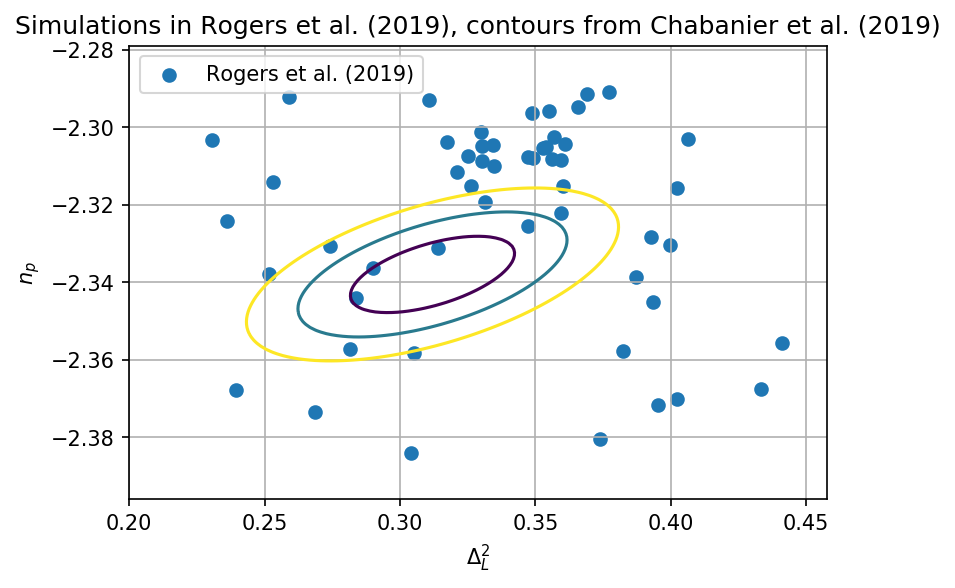

In [4]:
plt.figure()

# plot one point for each simulations
DL2=np.zeros(N)
n_p=np.empty(N)
for i in range(N):
    cosmo=cosmologies[i]
    params=cosmo['cosmo_params']
    DL2[i]=params['DeltaL2']
    n_p[i]=params['n_p']
plt.scatter(DL2,n_p,label='Rogers et al. (2019)')

# create grid (note j in number of elements, crazy python)
DL2_grid,np_grid = np.mgrid[0.2:0.4:100j,-2.38:-2.3:100j]
#chi2_grid=lya.gaussian_chi2_McDonald2005(np_grid,DL2_grid)
chi2_grid=lya.gaussian_chi2_Chabanier2018(np_grid,DL2_grid)

# we will plot the usual contours, equivalent to 1,2,3 sigma in 2D Gaussian
thresholds = [2.30,6.17,11.8]
plt.contour(DL2_grid,np_grid,chi2_grid,thresholds,label='Chabanier et al. (2019)')

plt.title('Simulations in Rogers et al. (2019), contours from Chabanier et al. (2019)')
plt.xlabel(r'$\Delta_L^2$')
plt.ylabel(r'$n_p$')
#plt.xlim([0.20,0.40])
#plt.ylim([-2.38,-2.30])
plt.legend()
plt.grid()                